# Income Classification

Original Dataset: https://archive.ics.uci.edu/ml/datasets/adult

### Imports

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

## Preparation

### Load data

In [32]:
train_df = pd.read_csv('adult.data', delimiter=',', skipinitialspace=True, na_values=['?'])
test_df = pd.read_csv('adult.test', delimiter=',', skipinitialspace=True, na_values=['?'])

train_df_size = train_df.shape[0]
test_df_size = test_df.shape[0]
df_size = train_df_size + test_df_size

print(f'Train Dataset Size: {train_df_size} ({(train_df_size/df_size):.2%})')
print(f'Test Dataset Size: {test_df_size} ({(test_df_size/df_size):.2%})')

Train Dataset Size: 32561 (66.67%)
Test Dataset Size: 16281 (33.33%)


### Pre Processing

First we need to label the data with ones for income >50k and zeros for income <=50k.

In [33]:
train_df['income'] = train_df['income'].apply(lambda x: 1 if x == '>50K' else 0)
test_df['income'] = test_df['income'].apply(lambda x: 1 if x == '>50K' else 0)

### Dataset Info

The dataset contains 9 character variables and 6 numerical variables.
**income** is the target variable.

In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


### Dataset statistics

Numeric variables:

In [35]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0
income,32561.0,0.240810,0.427581,0.0,0.0,0.0,0.0,1.0


Categorial variables:

In [36]:
categorical = [var for var in train_df.columns if train_df[var].dtype==object]

print('There are {} categorical variables:\n{}'.format(len(categorical), categorical))

There are 8 categorical variables:
['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']


In [37]:
for cat in categorical:
    print(train_df[cat].unique())

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' nan
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
['Male' 'Female']
['United-States' 'Cuba' 'Jamaica' 'India' nan 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' '

TODO: Welche Kategorien haben aussagekräftige Verteilungen?

sex binär darstellen

Boxplots nach Zielgröße und Kategorien


### Check missing values

In [38]:
train_df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

### Income Distribution on Training Set

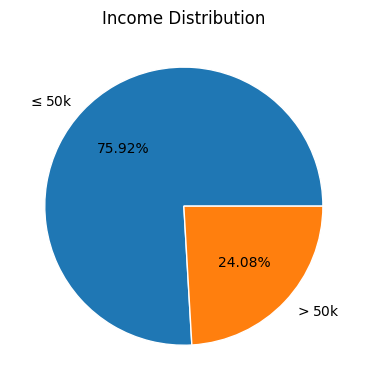

In [39]:
plt.figure(figsize=(4,4))
train_df['income'].value_counts().plot.pie(labels=[r'$\leq50$k', r'$>50$k'], autopct='%1.2f%%', wedgeprops = {"linewidth": 1, "edgecolor": "white"})
plt.title('Income Distribution')
plt.tight_layout()
plt.ylabel('')
plt.show()

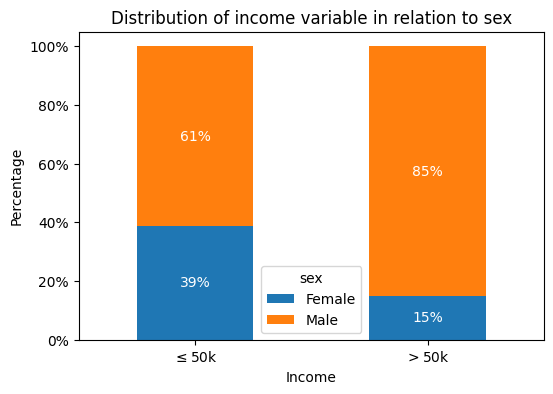

In [40]:
ct = pd.crosstab(train_df['income'], train_df['sex'])
ct_pct = ct.apply(lambda r: r/r.sum(), axis=1)

ax = ct_pct.plot(kind='bar', stacked=True, figsize=(6,4))

ax.set_title("Distribution of income variable in relation to sex")
ax.set_xlabel("Income")
ax.set_ylabel("Percentage")

ax.set_xticklabels([r'$\leq50$k', r'$>50$k'], rotation=0)
yticks = mtick.PercentFormatter(1)
ax.yaxis.set_major_formatter(yticks)

for i in ax.containers:
    ax.bar_label(i, label_type='center', color="white", fontsize=10, fmt='{:.0%}')

plt.show()

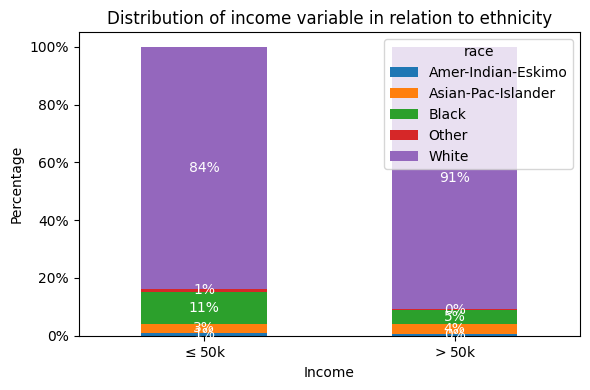

In [41]:
ct = pd.crosstab(train_df['income'], train_df['race'])
ct_pct = ct.apply(lambda r: r/r.sum(), axis=1)

ax = ct_pct.plot(kind='bar', stacked=True, figsize=(6,4))

ax.set_title("Distribution of income variable in relation to ethnicity")
ax.set_xlabel("Income")
ax.set_ylabel("Percentage")

ax.set_xticklabels([r'$\leq50$k', r'$>50$k'], rotation=0)
yticks = mtick.PercentFormatter(1)
ax.yaxis.set_major_formatter(yticks)

for i in ax.containers:
    ax.bar_label(i, label_type='center', color="white", fontsize=10, fmt='{:.0%}')

plt.tight_layout()
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, 'United-States'),
  Text(1, 0, 'Cuba'),
  Text(2, 0, 'Jamaica'),
  Text(3, 0, 'India'),
  Text(4, 0, 'Mexico'),
  Text(5, 0, 'South'),
  Text(6, 0, 'Puerto-Rico'),
  Text(7, 0, 'Honduras'),
  Text(8, 0, 'England'),
  Text(9, 0, 'Canada'),
  Text(10, 0, 'Germany'),
  Text(11, 0, 'Iran'),
  Text(12, 0, 'Philippines'),
  Text(13, 0, 'Italy'),
  Text(14, 0, 'Poland'),
  Text(15, 0, 'Columbia'),
  Text(16, 0, 'Cambodia'),
  Text(17, 0, 'Thailand'),
  Text(18, 0, 'Ecuador'),
  Text(19, 0, 'Laos'),
  Text(20, 0, 'Taiwan'),
  Text(21, 0, 'Haiti'),
  Text(22, 0, 'Portugal'),
  Text(23, 0, 'Dominican-Republic'),
  Text(24, 0, 'El-Salvador'),
  Text(25, 0, 'France'),
  Text(26, 0, 'Guatemala'),
  Text(27, 0, 'China'),
  Text(28, 0, 'Japan'),
  Text(29, 0, 'Yugoslavia'),
  Text(30, 0, 'Peru'),
  Te

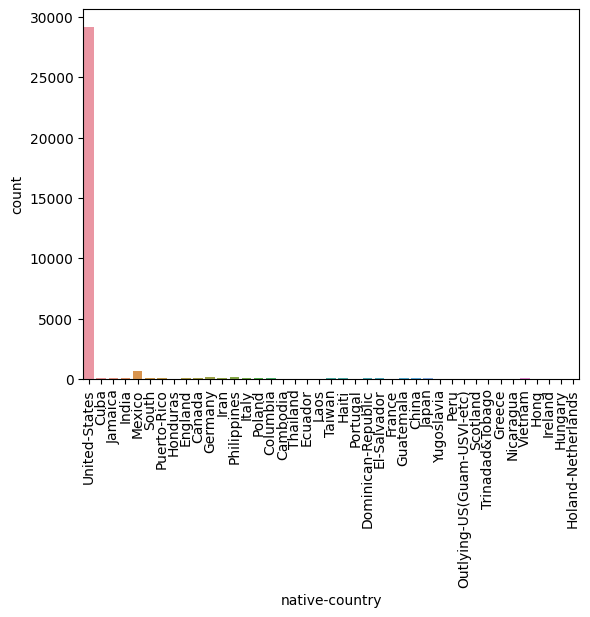

In [42]:
sns.countplot(data=train_df,x='native-country')
plt.xticks(rotation=90)

Mostly US Data
-> Erase the rest


In [43]:
train_df = train_df.drop('native-country',axis= 1)
test_df = test_df.drop("native-country", axis = 1)

In [44]:
print(train_df["education"].unique())
print(train_df["education-num"].unique())

['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


In [45]:
#education is already encoded in education-num so it is redundant
train_df = train_df.drop('education', axis=1)
test_df = test_df.drop('education', axis=1)

In [46]:
#Encoding sex into 0 for male and 1 for female
test_df['sex'] = test_df['sex'].apply(lambda x: 1 if x == 'Female' else 0)
train_df['sex'] = train_df['sex'].apply(lambda x: 1 if x== 'Female' else 0)

In [47]:
test_df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,0,0,0,40,0
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,0,0,0,50,0
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,0,0,0,40,0
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,0,7688,0,40,0
4,18,NaN,103497,10,Never-married,NaN,Own-child,White,1,0,0,30,0


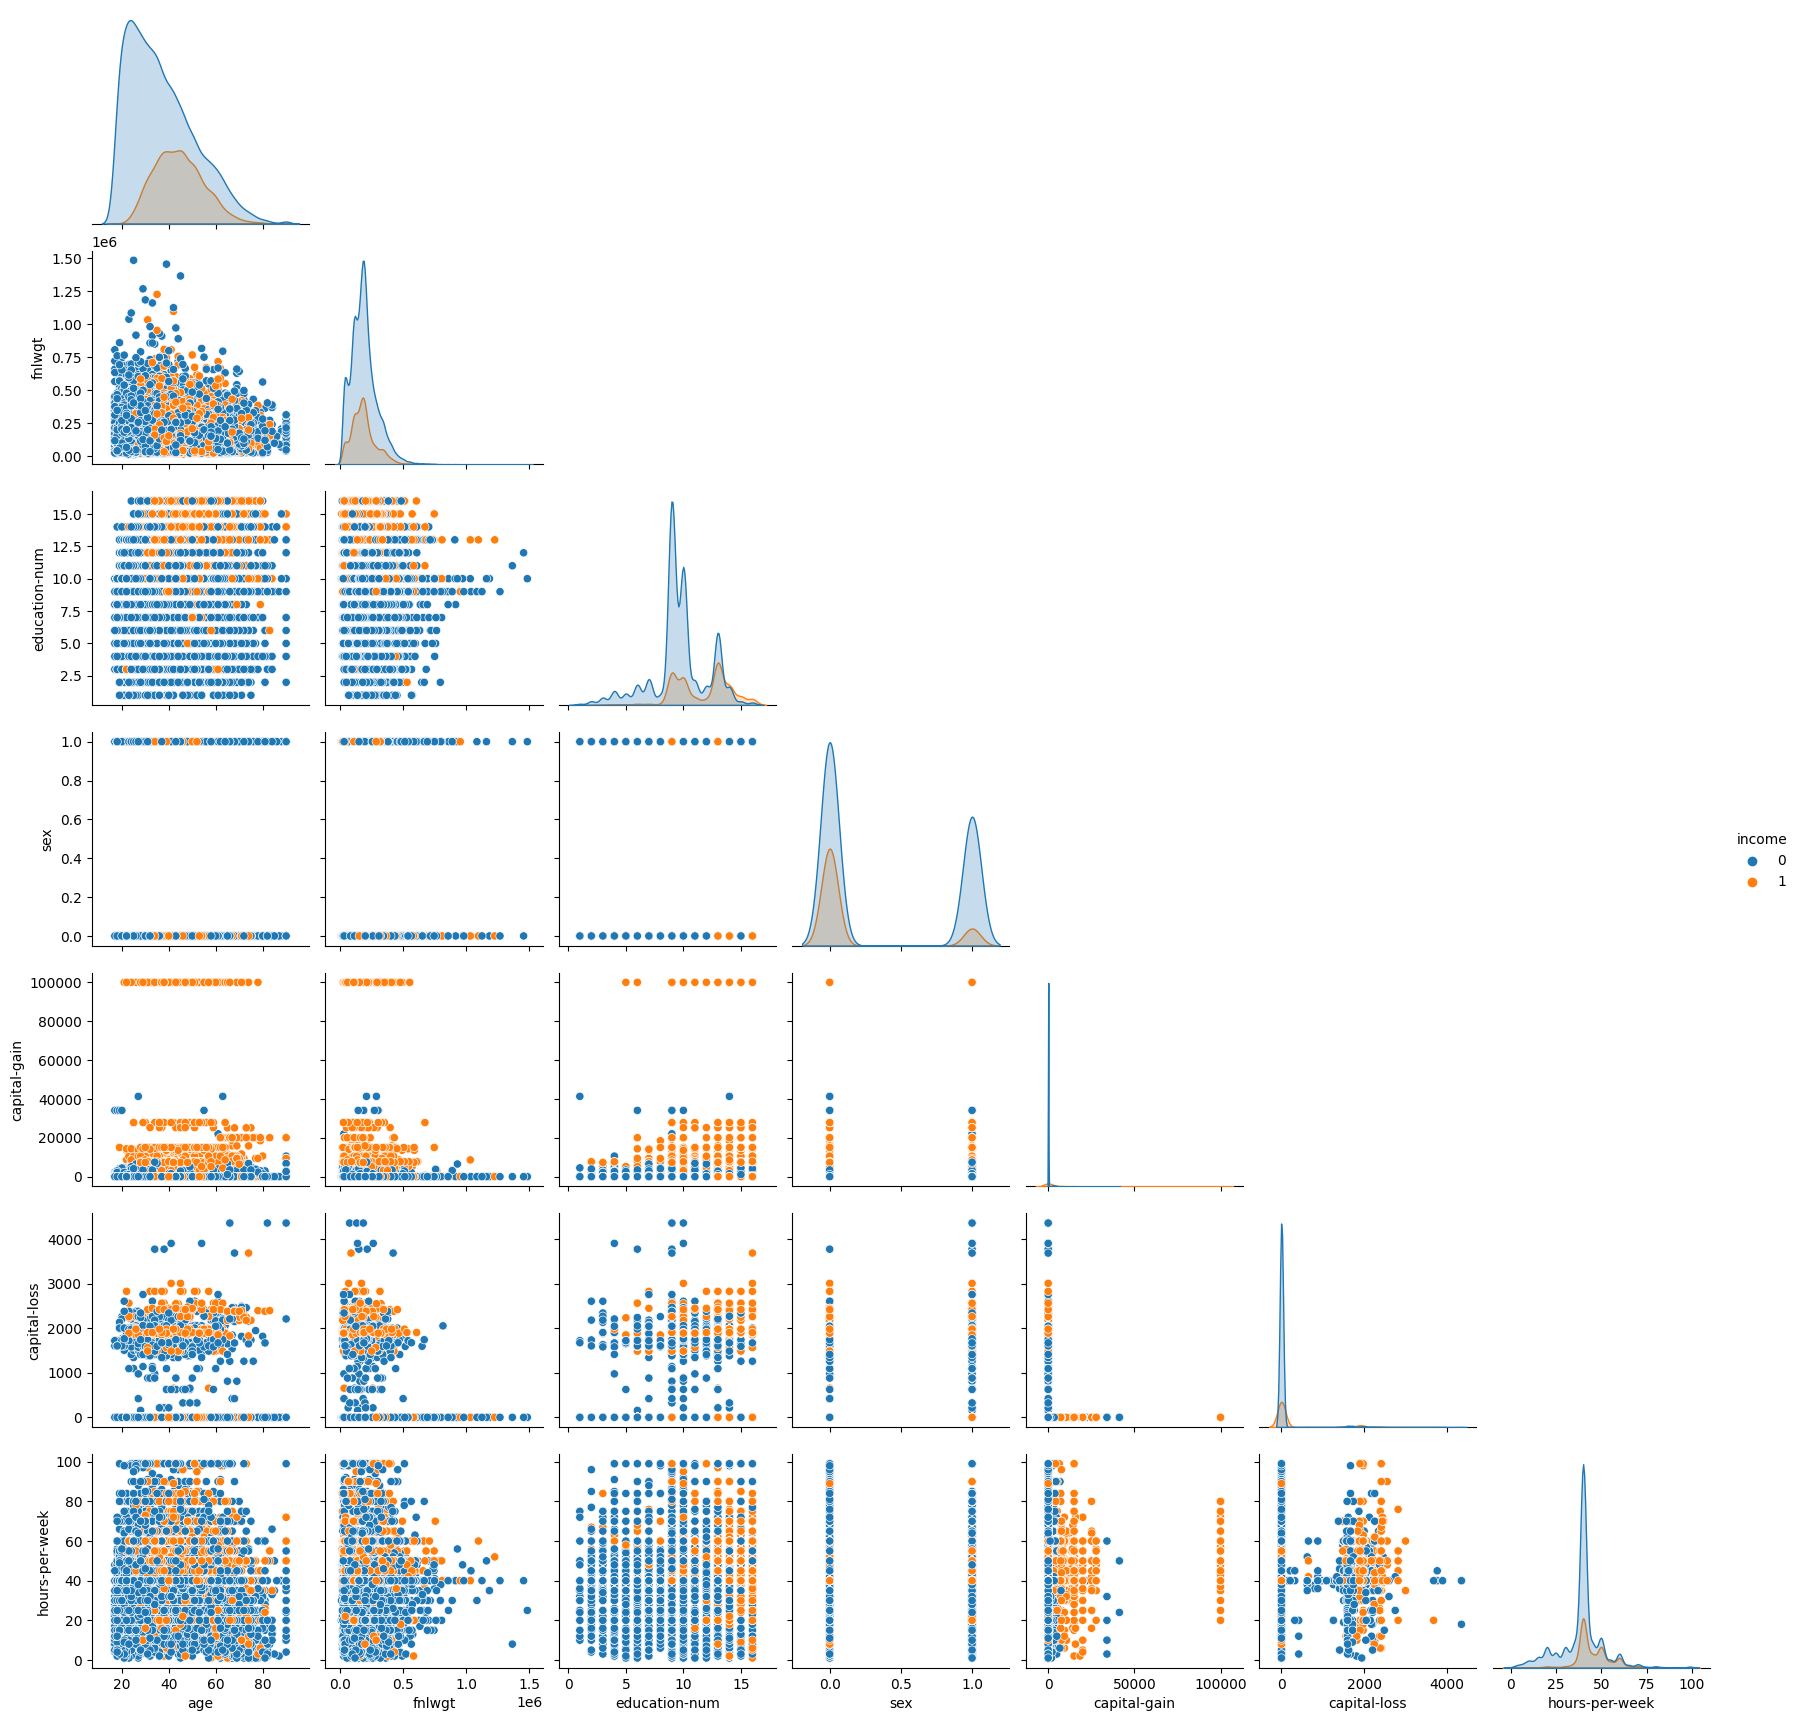

In [48]:
sns.pairplot(train_df, hue='income', corner=True)

<Axes: xlabel='income', ylabel='education-num'>

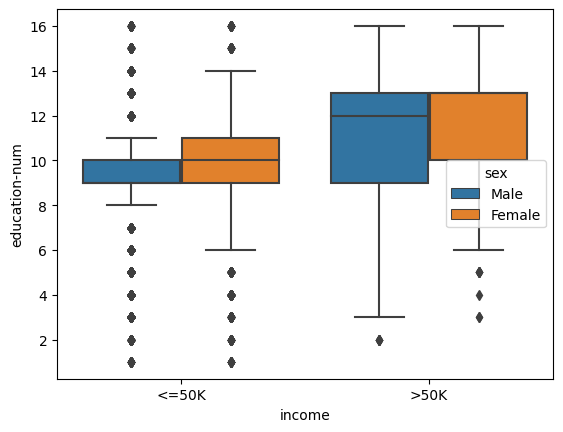

In [49]:
#education & sex in relation to income seems interesting
#I had to create another df, because with the preprocessed one I couldn't display the income correctly
df_train = pd.read_csv('adult.data', delimiter=',', skipinitialspace=True, na_values=['?'])
sns.boxplot(x = 'income', y='education-num',data=df_train, hue='sex')

You can see clearly that men can more easily make above 50k without higher education than women. You seee clearly that for the majority education has an impact on income above 50k.


In [50]:
def hist(x,title):
    plt.figure(figsize=(10,8))
    ax = sns.distplot(x, kde=False,bins=30)
    values = np.array([rec.get_height() for rec in ax.patches])
    norm = plt.Normalize(values.min(), values.max())
    colors = plt.cm.jet(norm(values))
    for rec, col in zip(ax.patches,colors):
        rec.set_color(col)
    plt.title(title, size=20, color='black')

C:\Users\felix\AppData\Local\Temp\ipykernel_29976\2548365617.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x, kde=False,bins=30)


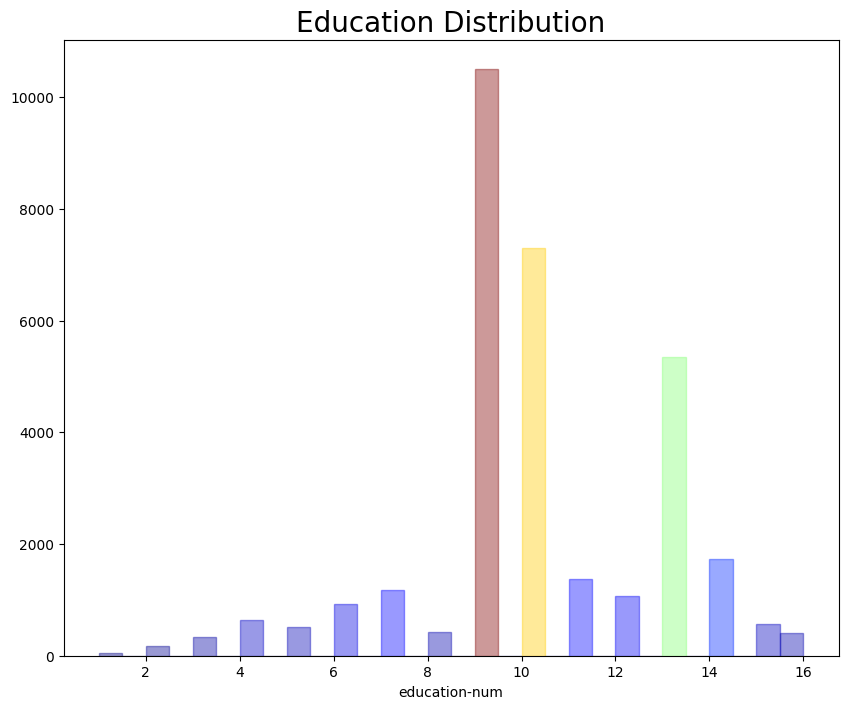

In [51]:
hist(df_train['education-num'], 'Education Distribution')

In [64]:
#pandas get dummies?
